In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class logistic_regression:

      
  def train(self,alpha = 0.02,max_iters = 600):
      # here we are initializing alpha and max_iters with some values 
      # cost_values and iterations are used to know the values of cost after every iteration 
  
      self.max_iters = max_iters
      self.alpha = alpha
      self.cost_values = []
      self.no_of_iterations = []
  
  # definition of sigmoid function.

  def sigmoid(self,x):
      return 1/(1+np.exp(-1*x))

  # defining normalizing function.

  def normalize(self,X):
      m = X.shape[0]
      for i in range(X.shape[1]):
          X[:,i] = (X[:,i] - np.mean(X[:,i]))/(np.std(X[:,i]) + np.exp(-5))
      X = np.hstack((np.ones((m, 1)), X))
      return X    
  

  def fit(self,X,y,k):
      
      self.k = k
      m = X.shape[0]
      n = X.shape[1]
      self.theta = np.zeros((self.k,n +1))
      
      # Normalization.

      X= self.normalize(X)

      # one vs all Classification.

      y_k = np.zeros((m,self.k))
      
      # Converting y_k into one vs all type array.

      for i in  range(m):
          y_k[i,y[i]] = 1    # remember all are in arrays.

      # applying gradient descent

      for i in range(self.max_iters):
          z = np.dot(X,(self.theta.T))
          hypo = self.sigmoid(z)

          # Parameter Update

          self.theta = self.theta - (self.alpha/m)*(np.dot((hypo-y_k).T,X))

          # Cost Function Calculation

          cost = (-1*np.sum(y_k*np.log(hypo) + (1-y_k)*np.log(1-hypo))/(m))
          self.cost_values.append(cost)
          self.no_of_iterations.append(i)
          if (i==0):
            print("Initial Cost:",cost)
          if (i==self.max_iters-1):
            print("Final Cost:",cost)
      return self
        

  def plot(self):
      # Plots cost function vs no.of iterations
      plt.xlabel("Iterations")
      plt.ylabel("Cost Value")
      plt.title("Gradient descent: Cost Value vs Iteration")
      plt.plot(self.no_of_iterations,self.cost_values)

  # defining prediction function.

  def predict(self,x):
    x = self.normalize(x)    # normalizing the values in x
    s = self.sigmoid(np.dot(x,self.theta.T))
    y_pred = s.argmax(axis = 1) # using argmax to get the indices of the maximum element along rows(axis=1)

    return y_pred
  
  # defining accuracy function.

  def accuracy(self,y_test,y_pred):
    m = len(y_test)  # m gives no of element we have tested or to be tested
    sum =0           # let sum be no of correct prediction by the algorithm
    for i in range(m):
        if (y_test[i] == y_pred[i]):
             sum += 1
    return (sum/m)*100

In [ ]:
train_data = pd.read_csv('sample_data/mnist_train_small.csv')
x_train = np.array(train_data.iloc[:,1:785])   # shape of x_train is (19999,784)
y_train = np.array(train_data.iloc[:,0])       # shape of y_train is (19999,1)

In [ ]:
a = logistic_regression() # here a is the object 

In [ ]:
a.train()
a.fit(x_train,y_train,10)

Initial Cost: 6.931471805599452
Final Cost: 1.0245412715221849


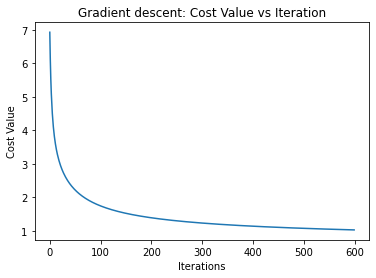

In [ ]:
a.plot()

In [ ]:
y_pred= a.predict(x_train)
print("Test Accuracy:",a.accuracy(y_train,y_pred))

Test Accuracy: 87.28936446822341


In [ ]:
test_data = pd.read_csv('sample_data/mnist_test.csv')
x_test = np.array(test_data.iloc[:,1:785])
y_test = np.array(test_data.iloc[:,0])

In [ ]:
b = logistic_regression()

In [ ]:
b.train()
b.fit(x_test,y_test,10)

Initial Cost: 6.931471805599453
Final Cost: 0.9669252956024603


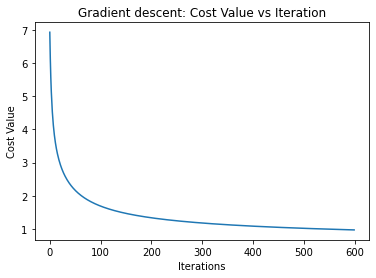

In [ ]:
b.plot()

In [ ]:
y_predict = b.predict(x_test)
print("Test accuracy is",b.accuracy(y_test,y_predict))

Test accuracy is 88.26882688268827
